In [2]:
#using Pkg
#Pkg.add("DifferentialEquations");
#Pkg.add("StatsBase");

## Part 1: systems with more than one species

## 1. System 1

$\emptyset \xrightarrow{\kappa_1}\mathcal{A}\xrightarrow{\kappa_2}\emptyset$

$\mathcal{A}\xrightarrow{\kappa_3}\mathcal{B}\xrightarrow{\kappa_4}\emptyset $

#### Define a function that computes the RHS of the chemical master equation.

In [3]:
using DifferentialEquations

In [4]:
n_upperbound = 30

Avec = collect(0:n_upperbound)
Bvec = collect(0:n_upperbound)

p = Iterators.product(Avec, Bvec)
points = collect.(p)
points_reshaped = reduce(hcat,points)
Apoints_matrix = reshape(points_reshaped[1,:], n_upperbound+1, n_upperbound+1)
Bpoints_matrix = reshape(points_reshaped[2,:], n_upperbound+1, n_upperbound+1)

function AB_system!(du, u, p, t)
    
    κ₁, κ₂, κ₃, κ₄, V = p

    u ./= sum(u) 

    l1, l2 = size(u)
    u_padded = [zeros(l1) u zeros(l1)]
    u_padded = ([zeros(l2+2) u_padded' zeros(l2+2)])'
   
    A = -κ₂*Apoints_matrix - κ₃*Apoints_matrix - κ₄*Bpoints_matrix - κ₁*V*ones(l1, l2)
    B = κ₁*V*ones(l1,l2)   
    C = κ₂.*(Apoints_matrix.+1)
    D = κ₃.*(Apoints_matrix.+1)
    E = κ₄.*(Bpoints_matrix.+1)

    du .=  A .* u + B .* u_padded[1:end-2, 2:end-1] + C .* u_padded[3:end, 2:end-1] + D .* u_padded[3:end, 1:end-2] + E .* u_padded[2:end-1, 3:end]
end

AB_system! (generic function with 1 method)

#### Set the initial condition, the time interval of interest and the parameters.

In [5]:
u₀ = zeros(n_upperbound+1, n_upperbound+1)
u₀[1, 1] = 1

T = 20.0
tspan = (0, T)

κ₁, κ₂, κ₃, κ₄, V = [2, 0.2, 0.2, 0.1, 1]
p = [κ₁, κ₂, κ₃, κ₄, V];

#### Create an ordinary differential equation problem with the variables defined above.

In [6]:
prob = ODEProblem(AB_system!, u₀, tspan, p)

ODEProblem with uType Matrix{Float64} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: 31×31 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  

#### Solve the ODE problem

In [7]:
sol = solve(prob, Tsit5(); dt=0.001);

#### Plot your numerical solution 

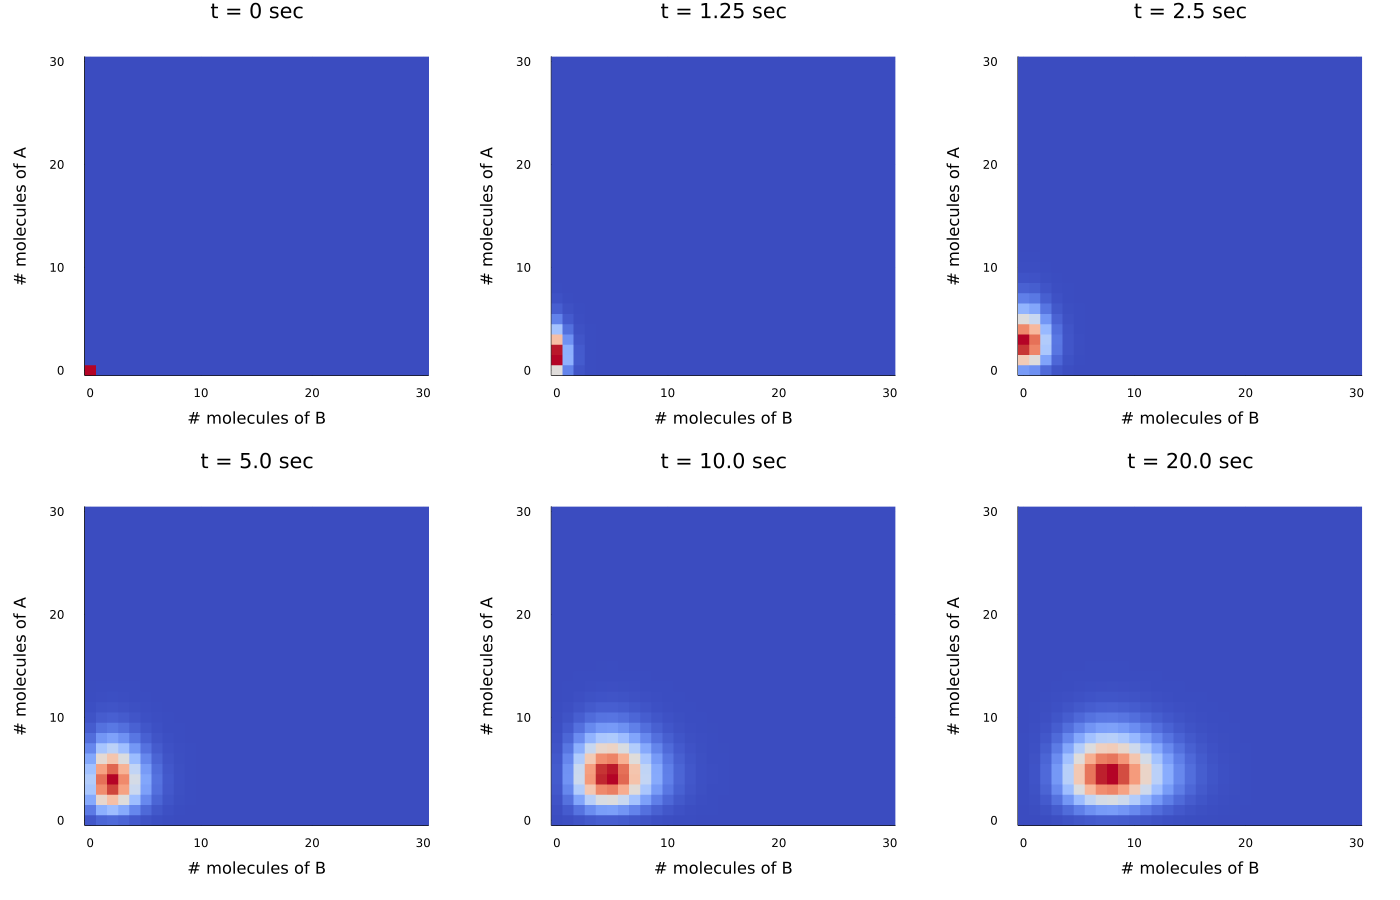

In [8]:
using Plots

a = heatmap(0:n_upperbound, 0:n_upperbound, sol(0),
    c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = 0 sec")

b = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/16), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/16) .*" sec")

c = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/8), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/8) .*" sec")

d = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/4), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/4) .*" sec")

e = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/2), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/2) .*" sec")

f = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T) .*" sec")


layout = @layout [a            b c 
    d e f]
Plots.plot(a, b, c, d, e, f;layout = layout,  colorbar = false, size = (1400, 900),  margin = 30Plots.px)

#### How about draws with the Gillespie algorithm?

In [9]:
using Distributions, StatsBase 

propensities = function(κ, x, ν, Nᵣ)
    ν_eval = zeros(Nᵣ)
    for r in 1:Nᵣ
        ν_eval[r] = ν[r](κ[r], x) 
    end
    return ν_eval
end

gillespie_alg = function(SM, κ, ν, x₀, stoptime)
    t = 0.0
    x = x₀
    
    Nₛ, Nᵣ = size(SM)
    
    tt = [t]
    xx = copy(x)     
    
    k=1
    
    while (t <= stoptime && k<1e6)
        
        # step 1
        ν_eval = propensities(κ, x, ν, Nᵣ)              
        α = sum(ν_eval) 

        # step 2
        τ = rand(Exponential(1/α))                                   
        t += τ

        # step 3
        index_j = StatsBase.sample(1:Nᵣ, Weights(ν_eval./α))
        
        x = x + SM[:, index_j]
        append!(tt, t)
        xx = cat(xx, x, dims=2)
        
        k+=1
    end
    
    return tt, xx'
end

#3 (generic function with 1 method)

In [10]:
# Compute the stoichiometric matrix 
Products = [1 0; 
            0 0; 
            0 1; 
            0 0]
Reactants = [0 0; 1 0; 1 0; 0 1]
SM = (Products-Reactants)'

# Compute the propensity function for each of the reactions
ν₁ =  function(νₛ, x) return νₛ*V end       
ν₂ = function(κ₂, x) return κ₂*x[1] end   
ν₃ = function(κ₃, x) return κ₃*x[1] end   
ν₄ = function(κ₄, x) return κ₄*x[2] end   

x₀ = [0, 0]

N = 1e4                     #number of realisations
n_upperbound = 30
pp = zeros(n_upperbound+1, n_upperbound+1)   #vector of probabilities

for n in 1:N   
    tt, xx = gillespie_alg(SM, [κ₁, κ₂, κ₃, κ₄], [ν₁, ν₂, ν₃, ν₄], x₀, T)
  
     nA, nB = xx[end, :]    

     if (nA <= n_upperbound && nB <= n_upperbound) 
        pp[nA+1, nB+1] += 1
     end
end

pp /= N;

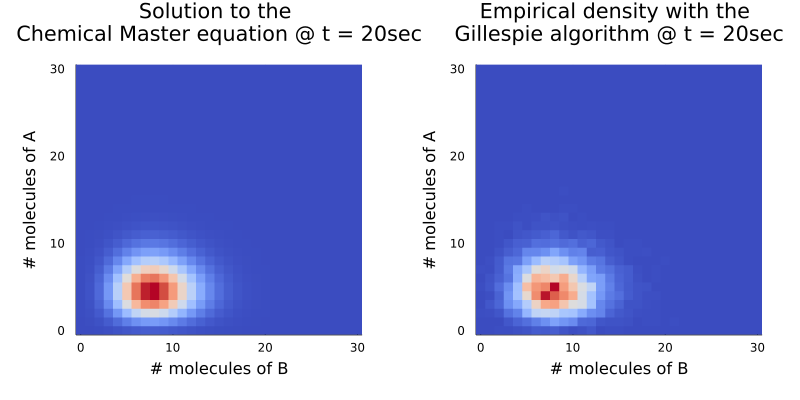

In [11]:
using Plots

a = heatmap(0:n_upperbound, 0:n_upperbound, sol(T),
    c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="Solution to the \nChemical Master equation @ t = 20sec")

b = heatmap(0:n_upperbound, 0:n_upperbound, pp, c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="Empirical density with the \nGillespie algorithm @ t = 20sec")

layout = @layout [a b]
Plots.plot(a, b; layout = layout,  colorbar = false, size = (800, 400),  margin = 30Plots.px)

## 2. System 2

$\mathcal{A}\xrightarrow{\kappa_1}\mathcal{0}$

$\mathcal{B}\xrightarrow{\kappa_2}\mathcal{A}$

$\emptyset \xrightarrow{\kappa_3}\mathcal{B}$

$\mathcal{A}+\mathcal{B}\xrightarrow{\kappa_4}2\mathcal{A}$

$\mathcal{A}+\mathcal{B}\xrightarrow{\kappa_5}2\mathcal{B}$

$\mathcal{A}\xrightarrow{\kappa_6}\emptyset$

$\mathcal{B}\xrightarrow{\kappa_7}\emptyset$

#### Define a function that computes the RHS of the chemical master equation.

In [12]:
n_upperbound = 20

Avec = collect(0:n_upperbound)
Bvec = collect(0:n_upperbound)

p = Iterators.product(Avec, Bvec)
points = collect.(p)
points_reshaped = reduce(hcat,points)
Apoints_matrix = reshape(points_reshaped[1,:], n_upperbound+1, n_upperbound+1)
Bpoints_matrix = reshape(points_reshaped[2,:], n_upperbound+1, n_upperbound+1)

function AB_system!(du, u, p, t)
    
    κ₁, κ₂, κ₃, κ₄, κ₅, κ₆, κ₇, V = p

    u ./= sum(u) 

    l1, l2 = size(u)
    u_padded = [zeros(l1) u zeros(l1)]
    u_padded = ([zeros(l2+2) u_padded' zeros(l2+2)])'
   
    A = (-κ₁*Apoints_matrix
        -κ₂*Bpoints_matrix 
        -κ₃*V*ones(l1,l2) 
        -κ₄*Apoints_matrix.*Bpoints_matrix./2V  
        -κ₅*Apoints_matrix.*Bpoints_matrix./2V        
        -κ₆*Apoints_matrix
        -κ₇*Bpoints_matrix)
    B = κ₁*(Apoints_matrix.+1)   
    C = κ₂*(Bpoints_matrix.+1)
    D = κ₃*V*ones(l1, l2)
    E = κ₄*(Bpoints_matrix.+1).*(Apoints_matrix.-1)/2V
    F = κ₅*(Bpoints_matrix.-1).*(Apoints_matrix.+1)/2V
    G = κ₆*(Apoints_matrix.+1)
    H = κ₇*(Bpoints_matrix.+1)

    du .=  (A .* u 
           +B .* u_padded[3:end, 1:end-2] 
           +C .* u_padded[1:end-2, 3:end] 
           +D .* u_padded[2:end-1, 1:end-2] 
           +E .* u_padded[1:end-2, 3:end]
           +F .* u_padded[3:end, 1:end-2]
           +G .* u_padded[3:end, 2:end-1]
           +H .* u_padded[2:end-1, 3:end])
end

AB_system! (generic function with 1 method)

#### Set the initial condition, the time interval of interest and the parameters.

In [13]:
u₀ = zeros(n_upperbound+1, n_upperbound+1)
u₀[6, 1] = 1

T = 20.0
tspan = (0, T)

κ₁, κ₂, κ₃, κ₄, κ₅, κ₆, κ₇, V =  [0.001, 0.05, 1, 0.5, 0.5, 0.1, 0.1, 1]
p = [κ₁, κ₂, κ₃, κ₄, κ₅, κ₆, κ₇, V];

#### Create an ordinary differential equation problem with the variables defined above.

In [14]:
prob = ODEProblem(AB_system!, u₀, tspan, p)

ODEProblem with uType Matrix{Float64} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: 21×21 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  

#### Solve the ODE problem

You can for example solve the problem using Tsit5()

In [15]:
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1719-element Vector{Float64}:
  0.0
  0.0008935239142316075
  0.009828763056547682
  0.03321049437397584
  0.06535569275601097
  0.10599044662756726
  0.15816166787338787
  0.22430127209338013
  0.3092836721569964
  0.41741061245211064
  0.5535437715196642
  0.7230672238750465
  0.9321321849319046
  ⋮
 19.88548773617738
 19.89661095274366
 19.907734168867943
 19.918857384550225
 19.929980602000498
 19.941103819008774
 19.952227035575053
 19.963350251699335
 19.974473468854942
 19.985596685568552
 19.996719901840166
 20.0
u: 1719-element Vector{Matrix{Float64}}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [5.68892774752621e-21 2.8967436979652444e-22 … 0.0 0.0; 3.1833903654196313e-16 1.3014206600950795e-17 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [9.058327907898058e-16 5.437318577253168e-17 … 0.0 0.0; 4.60696569263814e-12 2.2881089715464695e-13 … 0.0 0.0; … ; 

#### Plot your numerical solution 

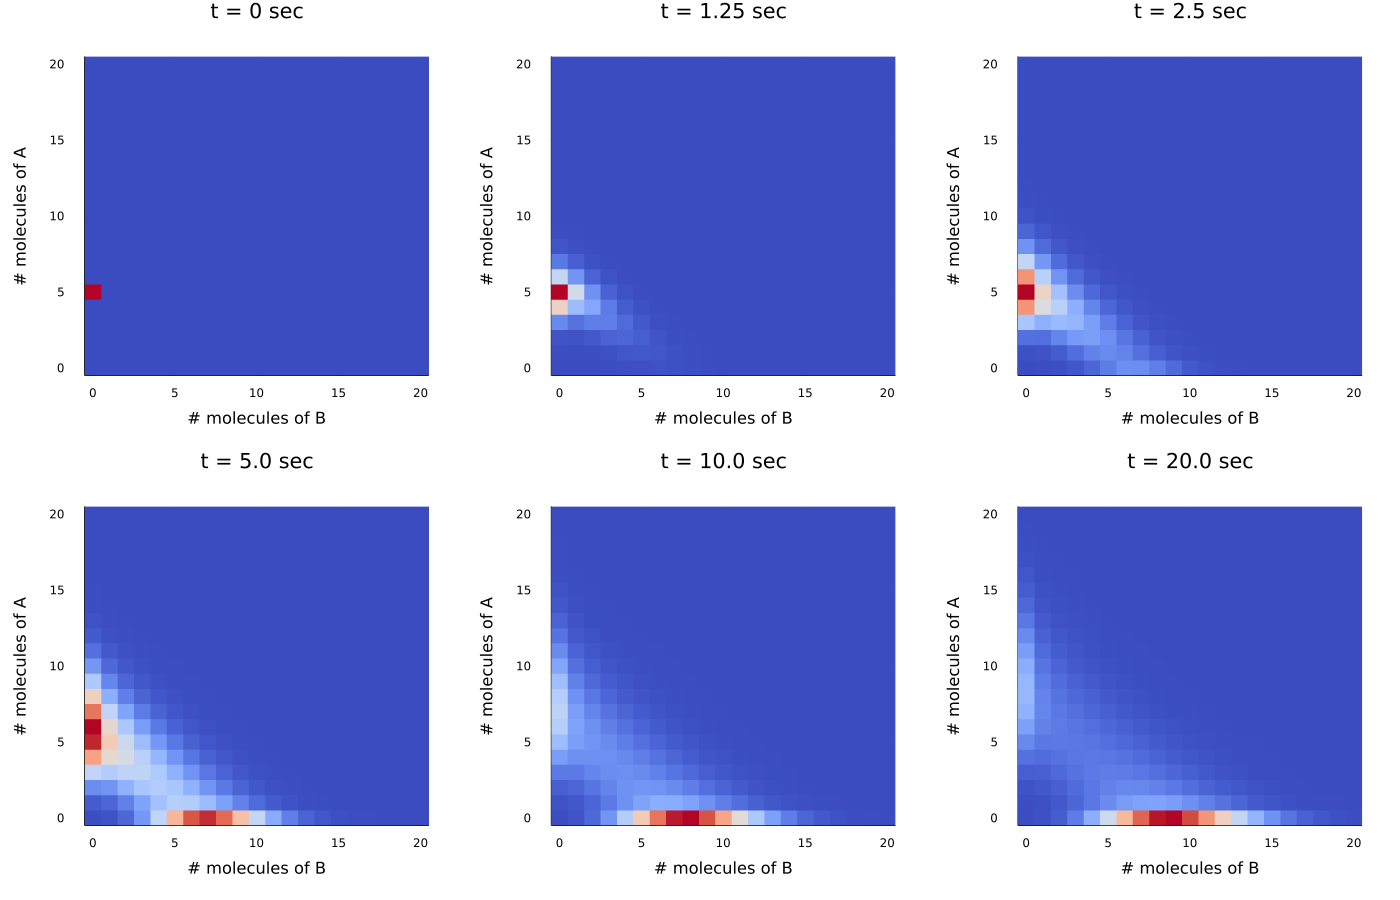

In [16]:
using Plots

a = heatmap(0:n_upperbound, 0:n_upperbound, sol(0),
    c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = 0 sec")

b = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/16), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/16) .*" sec")

c = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/8), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/8) .*" sec")

d = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/4), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/4) .*" sec")

e = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T/2), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T/2) .*" sec")

f = heatmap(0:n_upperbound,
    0:n_upperbound, sol(T), c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="t = ".* string(T) .*" sec")


layout = @layout [a            b c 
    d e f]
Plots.plot(a, b, c, d, e, f;layout = layout,  colorbar = false, size = (1400, 900),  margin = 30Plots.px)

#### How about draws with the Gillespie algorithm?

In [17]:
# Compute the stoichiometric matrix 
Products = [0 1; 1 0; 0 1; 2 0; 0 2; 0 0; 0 0]
Reactants = [1 0; 0 1; 0 0; 1 1; 1 1; 1 0; 0 1]
SM = (Products-Reactants)'

# Compute the propensity function for each of the reactions
ν₁ =  function(κ₁, x) return κ₁*x[1]  end       
ν₂ = function(κ₂, x) return κ₂*x[2] end   
ν₃ = function(κ₃, x) return κ₃*V end   
ν₄ = function(κ₄, x) return κ₄*x[1]*x[2]  end
ν₅ = function(κ₅, x) return κ₅*x[1]*x[2] end
ν₆ = function(κ₆, x) return κ₆*x[1] end
ν₇ = function(κ₇, x) return κ₇*x[2] end
 
x₀ = [5, 0]

N = 1e4                     #number of realisations

pp = zeros(n_upperbound+1, n_upperbound+1)   #vector of probabilities

for n in 1:N   
     tt, xx = gillespie_alg(SM, [κ₁, κ₂, κ₃, κ₄, κ₅, κ₆, κ₇], [ν₁, ν₂, ν₃, ν₄, ν₅,ν₆, ν₇], x₀, T)
  
     nA, nB = xx[end, :]    

     if (nA <= n_upperbound && nB <= n_upperbound) 
        pp[nA+1, nB+1] += 1
     end
end

pp /= N;

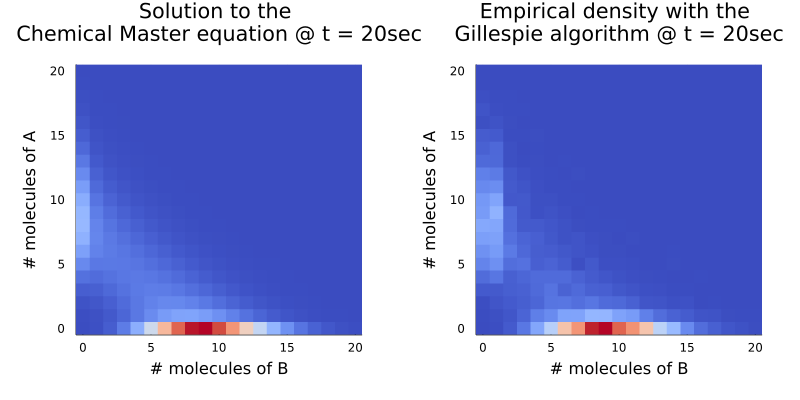

In [18]:
a = heatmap(0:n_upperbound, 0:n_upperbound, sol(T),
    c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="Solution to the \nChemical Master equation @ t = 20sec")

b = heatmap(0:n_upperbound, 0:n_upperbound, pp, c=:coolwarm,
    xlabel="# molecules of B", ylabel="# molecules of A", title="Empirical density with the \nGillespie algorithm @ t = 20sec")

layout = @layout [a b]
Plots.plot(a, b; layout = layout,  colorbar = false, size = (800, 400),  margin = 30Plots.px)

## Part 2: deterministic versus stochastic modelling

### Lotka-Volterra

Deterministic model:

$$d\begin{bmatrix}y_1(t) \\ y_2(t) \end{bmatrix} = \begin{bmatrix} \kappa_1 y_1(t)- \frac{\kappa_2}{V} y_1(t)y_2(t) \\ \frac{\kappa_2}{V} y_1(t)y_2(t)-\kappa_3y_2(t)  \end{bmatrix}dt, \quad \begin{bmatrix}y_1(0) \\ y_2(0) \end{bmatrix} = \begin{bmatrix}100 \\ 100 \end{bmatrix}.$$

Here, $y = (y_1, y_2)^\top$ and $\kappa_1 = 1$, $\kappa_2 =  5\times 10^{-3}$, and $\kappa_3 = 0.6$, and $V = 1$.

In [19]:
function lotka_volterra!(du, u, p, t)
    κ₁, κ₂, κ₃, V  = p
    du .= [κ₁*u[1] - κ₂*u[1]*u[2]/V,
           κ₂*u[1]*u[2]/V-κ₃*u[2]]
end

lotka_volterra! (generic function with 1 method)

Set the initial condition, the time interval of interest and the parameters

In [20]:
u₀ = [100, 100]

T = 15.0
tspan = (0, T)

κ₁, κ₂, κ₃, V = 1, 0.005, 0.6, 1.0
p = [κ₁, κ₂, κ₃, V];

Create an ordinary differential equation problem with the variables defined above.

In [21]:
prob = ODEProblem(lotka_volterra!, u₀, tspan, p)

ODEProblem with uType Vector{Int64} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: 2-element Vector{Int64}:
 100
 100

Solve the ODE problem

In [22]:
sol = solve(prob)
# OR sol2 = solve(prob2, #### (algorithm name); #### (parameters))

In [23]:
# Compute the stoichiometric matrix 
Products = [2 0; 0 2; 0 0]
Reactants = [1 0; 1 1; 0 1]
SM = (Products-Reactants)'

# Compute the propensity function for each of the reactions
ν₁ =  function(κ₁, y) return κ₁*y[1] end       
ν₂ = function(κ₂, y) return κ₂*y[1]*y[2]/V end          
ν₃ = function(κ₃, y) return κ₃*y[2] end   

T = 15.0
y₀ = u₀

2-element Vector{Int64}:
 100
 100

In [24]:
tt, yy = gillespie_alg(SM, [κ₁, κ₂, κ₃], [ν₁, ν₂, ν₃], y₀, T)

([0.0, 0.0012044985931863469, 0.00134141238889642, 0.0016697405556296407, 0.015746572237407157, 0.01751603173329227, 0.024299751591754112, 0.032463126450146707, 0.039558235432356155, 0.039828653767716146  …  14.963676998671465, 14.971657771198252, 14.977623837088712, 14.982827443875525, 14.983067962790312, 14.983983834267862, 14.98443805519641, 14.991874422596583, 14.994913360293769, 15.009874846727058], [100 100; 99 101; … ; 9 196; 9 195])

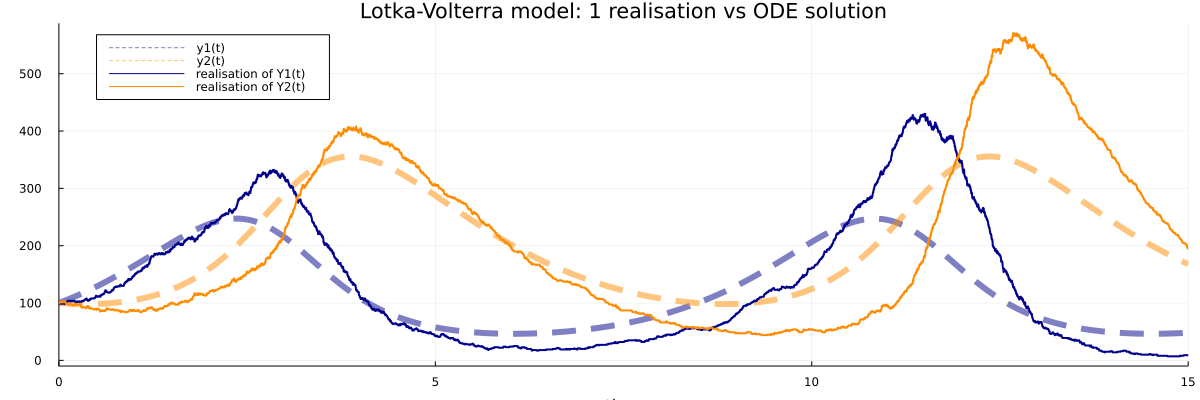

In [25]:
plot(sol, linewidth= 6.0, alpha=0.5, colour=[:darkblue :darkorange], size=(1200,400), linestyle=:dash, labels = ["y1(t)" "y2(t)"],
    xlabel="time", ylabel="# individuals", title="Lotka-Volterra model: 1 realisation vs ODE solution") 
plot!(tt, yy, linetype=:steppre, linewidth = 2.0, alpha=1.0, legend=:topleft, labels = ["realisation of Y1(t)" "realisation of Y2(t)"], colour=[:darkblue :darkorange])

#### Stochastic mean vs ODE solution

In [26]:
left_bin_edges = 0.0:0.001:T
mm = zeros(length(left_bin_edges), 2)

Nₛ = 200

for nₛ in 1:Nₛ    
    tt, yy = gillespie_alg(SM, [κ₁, κ₂, κ₃], [ν₁, ν₂, ν₃], y₀, T)
    
    
    ## Computing stochastic mean (code not optimized yet)
    idxs = searchsortedfirst.(Ref(left_bin_edges[1:end-1]), tt)

    for j in 1:length(idxs)
        if j == 1
            yy_extended = repeat(yy[j,:]', idxs[j])
        else
            updates = repeat(yy[j,:]', idxs[j]-idxs[j-1])
            if size(updates, 1) > 0
               yy_extended = [yy_extended; updates] 
            else
                yy_extended[end, :] += yy[j,:]
            end
        end
    end

    ## Filling the end section
    if idxs[end] < length(left_bin_edges) 
        yy_extended = [yy_extended; repeat(yy[end, :]', length(left_bin_edges) -  size(yy_extended, 1))]
    end
    
    mm += yy_extended./Nₛ
end

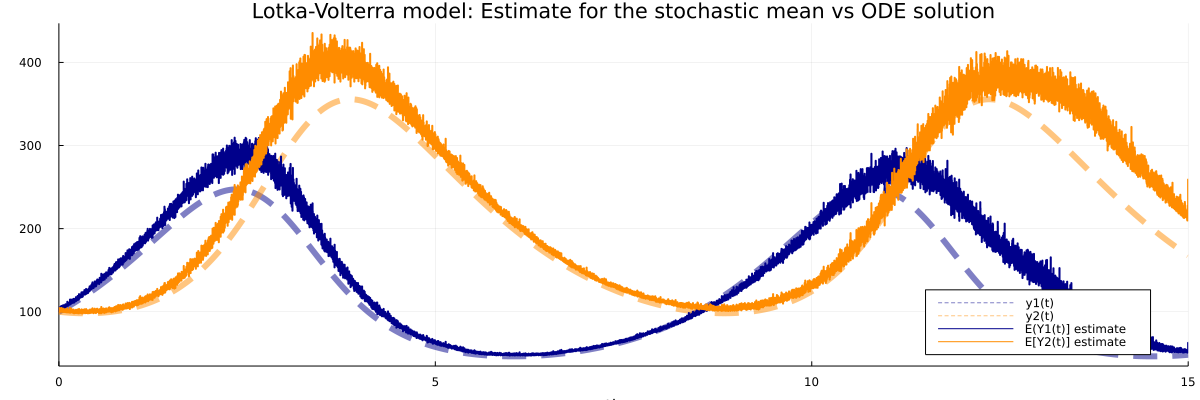

In [27]:
plot(sol, linewidth= 6.0, alpha=0.5, colour=[:darkblue :darkorange], size=(1200,400), linestyle=:dash, labels = ["y1(t)" "y2(t)"],
        xlabel="time", ylabel="# individuals", title="Lotka-Volterra model: Estimate for the stochastic mean vs ODE solution") 
plot!(left_bin_edges, mm, linetype=:steppre, linewidth = 2.0, alpha=1.0, legend=:bottomright,  labels = ["E(Y1(t)] estimate" "E[Y2(t)] estimate"], colour=[:darkblue :darkorange])